## Estatistica 01 - Conceitos básicos

“Estatística é a Ciência que permite obter conclusões a partir de dados”
- -Velleman, Paul

***

### Sobre esse notebook

Esse notebook tem como objetivo explorar conceitos básicos de estatistica e mostrar exemplos praticos com datasets:<br>
- __Bibliotecas__ : As libs utilizadas nesse notebook são:

In [1]:
import math # Biblioteca para operações matematicas
import numpy as np # Para manipulacao de valores numericos 
import pandas as pd # Para manipulacao de estruturas de tabela
import sklearn # Para importar datasets
import seaborn as sns # Biblioteca auxiliar ao matplotlib tambem utilizada para plot de graficos
from matplotlib import pyplot as plt # Utilizado para criar plots graficos de dados
from datetime import datetime as dt # Para manipulacao de variaveis de tempo

Construido com Python 3.7.1 | 64 BITS<BR> Por: Marcelo Mastrangi Bracali. <BR> A utilizacao desse notebook e indiscriminada e o mesmo pode ser utilizado/modificado/consultado sem nem um tipo de restricao.

***

### Dataset

Nesse notebook, trataremos apenas estatistica descritiva, não entraremos em assuntos como amostragem e probabilidade. <br> Para esses estudos utilizaremos o dataset de batalhas e personagens mortos do Game oF thrones.
- O dataset pode ser encontrado no Kaggle, em: https://www.kaggle.com/mylesoneill/game-of-thrones/version/1#_=_
- Desse dataset utilizaremos duas tabelas, a de batalhas que aconteceram e a de personagens mortos durante o curso da historia

In [2]:
df_battles = pd.read_csv('battles.csv')
df_deaths = pd.read_csv('character-deaths.csv') 

Para verificar se os datasets foram importados de acordo, basta utilizar o comando df_x.head(), esse notebook não apresentou os dataframes por uma questao estetica, mas os mesmos foram conferidos.

***

### Tipos de variaveis

Agora que temos o nosso dataset exemplo, vamos abordar a questão de tipos de variaveis, onde temos dois tipos<br>


As Qualitativas (Categóricas) que podem ser divididas em:
-  Nominais (Nominal)
    -  Cor, sexo, estado Sivil, Vale transporte (sim ou nao)
    -  __Variaveis que no geral sao descritivas e nao possuem uma ordem de grandeza__
-  Ordinais (Ordinal)
    -  Escala de questionário
    -  Preferencia
    -  Faixa Etaria
    -  Classe social
    -  Grau de escolaridade
    -  __Variaveis que possuem alguma ordem de grandeza entre seus dados, onde o maior e o menor possuem algum valor significativo__

Ja as quantitativas podem ser divididas em:
-  Discreta (Contagens)
    -  Escala de questionario (Numérica, ex: satisfacao de 1 a 10)
    -  Numero de filhos
    -  Quantidade de empregados
    -  Quantidade de ligacoes
    -  Anos de estudo
    -  __Contagens absolutas, traduzidas em somatorios de unidades de dados que sao traduzidos em informacoes atraves da agregacao de alguma metrica__
-  Continua (Medicao)
    -  Salario mensal
    -  Idade
    -  Taxas
    -  __Valores continuos que dizem respeito a alguma ordem de grandeza__

### Exemplos

Antes de iniciarmos os exemplos, aqui seguem as primeiras 5 linhas dos nossos dataframes para qualquer efeito de comparacao

In [3]:
df_deaths.loc[0:5, 'Name':'DwD'] # Dataset com as mortes de personagens

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0


In [4]:
df_battles.loc[0:5, 'name':'note'] # Dataset com as batalhas na historia

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN


Vamos a alguns exemplos, olhando para nossos datasets, iniciando por variaveis Qualitativas:

No dataset df_deaths, podemos encontrar dois exemplos de variaveis qualitativas, uma nominal e outra ordinal
-  Como exemplo de variavei nominal podemos ter como exemplo a coluna 'Allegiances', que diz a qual reino o personagem pertence
-  Ja como ordinal, temos a coluna Nobility, que é uma escala de 0 a 1, onde 0 sao personagens que nao pertencem a nobreza e 1 personagens que pertencem a nobreza
    -  Essa variavel também pode ser considerada nominal dependendo do ponto de vista, mas para propositos ludicos vamos trata-la como ordinal

In [5]:
df_deaths.loc[5:10:, ['Name','Allegiances','Nobility']]

,Name,Allegiances,Nobility
5,Aemon Estermont,Baratheon,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,1
7,Aenys Frey,None,1
8,Aeron Greyjoy,House Greyjoy,1
9,Aethan,Night's Watch,0
10,Aggar,House Greyjoy,0


Atraves do metodo dataframe.loc[x,x], selecionei as __linhas 5 a 10__ e as __colunas 'Name','Allegiances','Nobility'__
<br> A coluna __Allegiances__, de forma clara, mostra dados nominais, enquanto a coluna __Nobility__ cria uma classificacao em ordem de grandeza para nobres ou nao
<br><br> Essa observacao e interessante ao ponto que fica muito claro que apesar de compostas de formas diferentes, ambas as variaveis estao ligadas a informacoes descritivas dos personagens na __coluna mais a esquerda__.

Para as variaveis quantitativas podemos utilziar como exemplo:
-  Para o exemplo de variavel discreta, gostaria de salientar duas colunas, __attacker_size__ e __defender_size__ no dataframe __df_battles__
-  Como exemplo de variavel continua podemos utilizar a coluna __Death Year__ do dataframe __df_death__

In [6]:
df_battles.loc[15:20:, ['name','attacker_size','defender_size']]

,name,attacker_size,defender_size
15,Siege of Storm's End,5000.0,20000.0
16,Battle of the Fords,20000.0,10000.0
17,Sack of Harrenhal,100.0,100.0
18,Battle of the Crag,6000.0,NaN
19,Battle of the Blackwater,21000.0,7250.0
20,Siege of Darry,NaN,NaN


Podemos ver a quantidade de unidades atacantes e defensoras, se percebe nitidamente como essa variavel conta a quantidade de algo em seu absoluto, variaveis __discretas__ são muito faceis de ser classificadas<br>

In [7]:
df_deaths.loc[5:10:, ['Name','Death Year']]

,Name,Death Year
5,Aemon Estermont,NaN
6,Aemon Targaryen (son of Maekar I),300.0
7,Aenys Frey,300.0
8,Aeron Greyjoy,NaN
9,Aethan,NaN
10,Aggar,299.0


Enquanto uma variavel __continua__, podemos ver que o ano de morte dos personagens acontece.

***

### Exploração de dados

Média, moda e mediana, aplicada a coluna __year__
-  Média é a soma de todos os valores de uma variavel dividido pela quantidade de observações dentro da variavel
-  Moda é o valor que mais aparece dentro de uma variavel
-  Mediana é o valor que representa o exato meio dos valores das observações

In [8]:
print(f"""A média dos dados é {df_battles['year'].mean()}
A mediana é {df_battles['year'].median()}
A moda é {df_battles['year'].mode()}""")

A média dos dados é 299.10526315789474
A mediana é 299.0
A moda é 0    299
dtype: int64


<br><br>Sobre amplitude, variancia e desvio padrão
-  A amplitude mostra a distancia maxima entre os valores de uma variavel, vamos aplicar esse conceito na variavel __year__, que condiz com o ano em que a batalha a acontece
-  É a média da distancia entre a média da variavel e cada um dos pontos da variavel ao quadrado, exemplficando com a variavel __year__.
-  É a raiz da variancia, vamos aplicar também aplicado a variavel __year__.

In [9]:
print(f"""Na amostra, o maior valor é: {df_battles['year'].max()}, o menor {df_battles['year'].min()}
e a amplitude {df_battles['year'].max() - df_battles['year'].min()}
A variância é {df_battles['year'].var()}
Desvio padrão {df_battles['year'].std()}      
      """)

Na amostra, o maior valor é: 300, o menor 298
e a amplitude 2
A variância é 0.4751066856330013
Desvio padrão 0.6892798311520519      
      


### Criação de faixas

Transformação de variaveis quantitativas em qualitativas, exemplificando com a coluna __attacker_size__ do __dataframe df_battles__, que é uma variavel discreta

A titulo de exploração, é interessante separarmos os valores de uma variavel em faixas, uma das formas mais comuns é através da fórmula de Sturges
<br>A fórmula de Sturges: K = 1 + 3,322 * log n 
<br>Onde n é o numero de observações de uma variavel
<br><br>Para descobrir o intervalo da faixa:
<br>(Maior valor da amostra - Menor valor da amostra)/k
<br><br> E assim, de forma elementar numero de faixas é o maior valor da amostra dividido pelo intervalo

In [10]:
k = 1 + (3.322 * math.log(df_battles['attacker_size'].count()))
print(f"""K é igual a: {k}""")

K é igual a: 11.557494824415876


In [11]:
intervalo = (df_battles['attacker_size'].max() - df_battles['attacker_size'].min())/k
print(f"""O intervalo deve ser de {intervalo} em {intervalo}""")

O intervalo deve ser de 8650.66361862317 em 8650.66361862317


In [12]:
faixas = df_battles['attacker_size'].max()/intervalo
print(f"""O numero de faixas é: {faixas}""")

O numero de faixas é: 11.55980678577303


***

### Plots

Distribuição através de histogramas

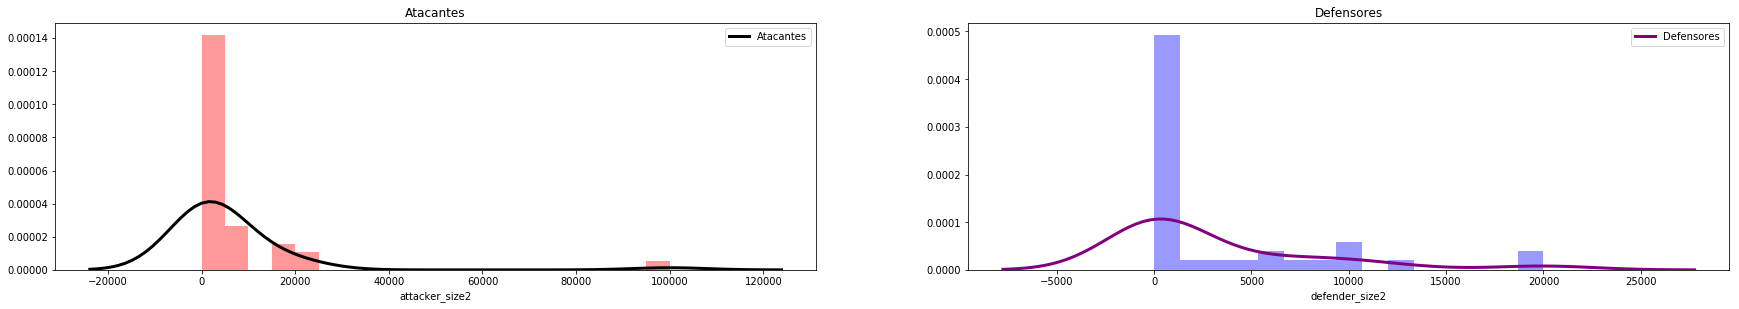

In [13]:
df_battles['attacker_size2'] = df_battles['attacker_size'].fillna(0)
df_battles['defender_size2'] = df_battles['defender_size'].fillna(0)
plt.figure(figsize=(30,10))

plt.subplot(221)
plt.title("Atacantes")
ax = sns.distplot(df_battles['attacker_size2'], color = 'red', bins = (20)
                    ,kde_kws={"color": "black", "lw": 3,"label": "Atacantes"}
                 )
plt.subplot(222)
plt.title("Defensores")
ax = sns.distplot(df_battles['defender_size2'], color = 'blue', bins = (15)
                    ,kde_kws={"color": "purple", "lw": 3,"label": "Defensores"}
                 )

A mediana é a medida que é mais influenciada pela distribuição dos dados, enquanto a média sofre mais alterações dado o numero de outliers e a moda não tende a sofrer tanto

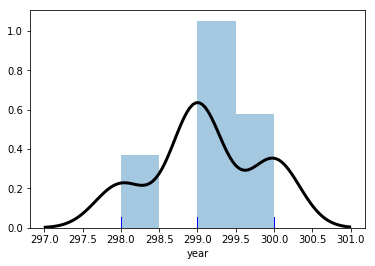

In [14]:
ax = sns.distplot(df_battles['year'], bins = (4)
                    ,rug=True, rug_kws={"color": "blue"}
                    ,kde_kws={"color": "k", "lw": 3}
                 )